In [ ]:
#importing weather data for Braunschweig
import pandas as pd
import requests
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=weatherdataforcities&start=2019-01-01&end=2023-12-31&cityName=Braunschweig"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    Braun_data = response.json()

    # Convert the data to a DataFrame
    Braun_df = pd.DataFrame.from_dict(Braun_data , orient='index')

    # Reset the index to convert the timestamp to a column
    Braun_df.reset_index(inplace=True)

else:
    print("Failed to fetch data. Status code:", response.status_code)





In [ ]:

# drop unwanted columns

Braun_df = Braun_df.drop(columns = ["index", "time","snow","cityName"])
Braun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    43824 non-null  float64
 1   dwpt    43824 non-null  float64
 2   rhum    43824 non-null  float64
 3   prcp    43824 non-null  float64
 4   wdir    43824 non-null  float64
 5   wspd    43824 non-null  float64
 6   wpgt    43823 non-null  float64
 7   pres    43824 non-null  float64
 8   tsun    42575 non-null  float64
 9   coco    43824 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [ ]:
Braun_df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,8.6,5.2,79.0,0.0,260.0,22.0,38.0,1027.8,0.0,7.0
1,8.1,5.4,83.0,0.0,260.0,21.6,44.0,1027.0,0.0,7.0
2,7.8,5.9,88.0,0.0,260.0,20.2,40.0,1026.2,0.0,7.0
3,7.6,5.7,88.0,0.0,270.0,21.6,40.0,1025.5,0.0,7.0
4,7.6,5.2,85.0,0.0,270.0,23.0,47.0,1024.5,0.0,7.0


In [ ]:
#Checking for null values
Braun_df.isnull().sum()

temp       0
dwpt       0
rhum       0
prcp       0
wdir       0
wspd       0
wpgt       1
pres       0
tsun    1249
coco       0
dtype: int64

In [ ]:
# find the percentage of missing values in each feature
Braun_df.isnull().sum()/len(Braun_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.002282
pres    0.000000
tsun    2.850037
coco    0.000000
dtype: float64

In [ ]:
mask_nntsun = Braun_df['tsun'].isnull()
Braun_df[mask_nntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
3704,19.4,16.2,82.0,0.0,90.0,7.6,13.0,1013.6,NaN,4.0
3705,19.7,16.2,80.0,0.0,165.0,5.4,13.0,1013.6,NaN,4.0
3706,21.1,16.3,74.0,0.0,161.0,5.4,16.7,1013.3,NaN,3.0
3707,22.6,16.4,68.0,0.0,360.0,7.6,18.5,1012.8,NaN,3.0
3708,24.0,16.8,64.0,0.0,158.0,5.4,18.5,1012.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
41022,16.7,14.3,86.0,0.0,0.0,0.0,7.4,1022.3,NaN,1.0
41023,19.0,14.5,75.0,0.0,90.0,1.8,9.3,1022.7,NaN,1.0
41024,21.5,14.9,66.0,0.0,90.0,5.4,11.1,1022.8,NaN,1.0
41026,26.0,14.8,50.0,0.0,130.0,9.4,16.7,1022.8,NaN,1.0


In [ ]:
#Using Linear Regression Imputation to fill missing values in the tsun feature
from sklearn.linear_model import LinearRegression

# seperate the null  values of the tsun feature
test =  Braun_df[Braun_df["tsun"].isnull()]
X_test = test.drop(columns = ["tsun","wpgt"] )

#Dropping the null values from the dataset
train = Braun_df.dropna()
#Splitting the train data into target and feature
X_train= train.drop(columns = ["tsun","wpgt"])
y_train = train["tsun"]

#Calling the linear regression model
lr = LinearRegression()
#Fitting the tranining data in to the model
lr.fit(X_train, y_train)
#Predicting the missing tsun values
y_pred = lr.predict(X_test)

#Replacing the missing values with the model prediction
Braun_df.loc[Braun_df.tsun.isnull(),"tsun"] = y_pred






In [ ]:
#Check if missing values still exists for the tsun feature
Braun_df.isnull().sum()/len(Braun_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.002282
pres    0.000000
tsun    0.000000
coco    0.000000
dtype: float64

In [ ]:
Braun_df[Braun_df["wpgt"].isnull()]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco


In [ ]:
missing_indices = [30230]

# Perform linear interpolation specifically for the given indices
Braun_df.loc[missing_indices, 'wpgt'] = Braun_df['wpgt'].interpolate(method='linear')[missing_indices]




In [ ]:
#Check if missing values still exists for the wpgt feature
Braun_df.isnull().sum()/len(Braun_df) *100


temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:

Braun_df.isnull().sum()

temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
coco    0
dtype: int64

In [ ]:
# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = Braun_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
Braun_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,11.010465,6.295480,75.360761,0.071308,201.808712,12.066286,22.692358,1015.572552,12.534764,4.169382
std,7.389206,5.974133,17.129828,0.455242,81.278713,6.502132,12.049749,10.053409,21.410508,2.775375
min,-18.600000,-20.400000,14.000000,0.000000,0.000000,0.000000,1.000000,975.000000,-12.972907,0.000000
25%,5.400000,1.800000,65.000000,0.000000,140.000000,7.600000,14.000000,1009.400000,0.000000,2.000000
50%,10.500000,6.300000,79.000000,0.000000,220.000000,10.800000,21.000000,1016.300000,0.000000,4.000000
75%,16.300000,10.900000,89.000000,0.000000,260.000000,15.800000,30.000000,1022.100000,18.000000,4.000000
max,37.900000,22.100000,100.000000,27.000000,360.000000,48.600000,102.000000,1047.700000,74.935438,25.000000


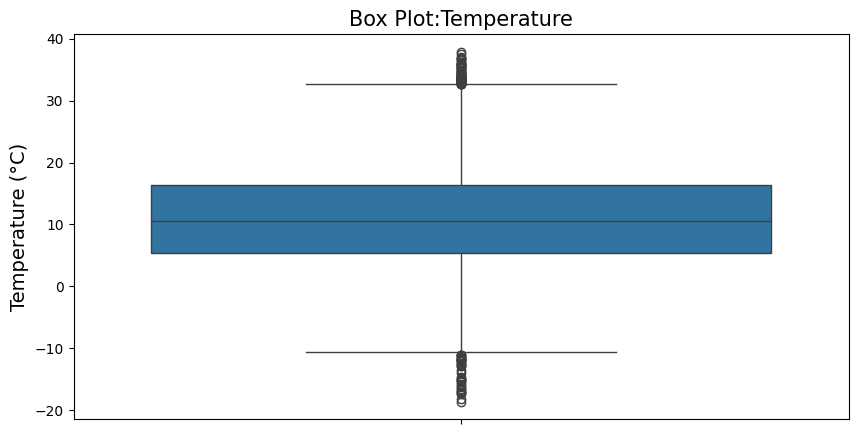

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.temp)
plt.title('Box Plot:Temperature', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

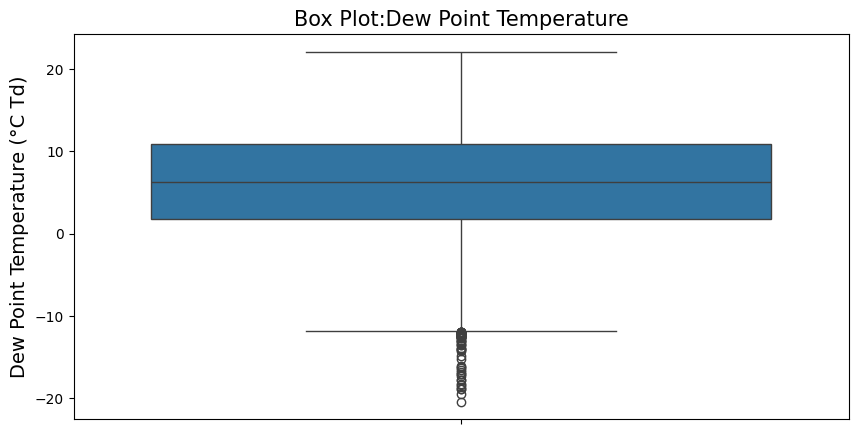

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.dwpt)
plt.title('Box Plot:Dew Point Temperature', fontsize=15)
plt.ylabel('Dew Point Temperature (°C Td)', fontsize=14)
plt.show()

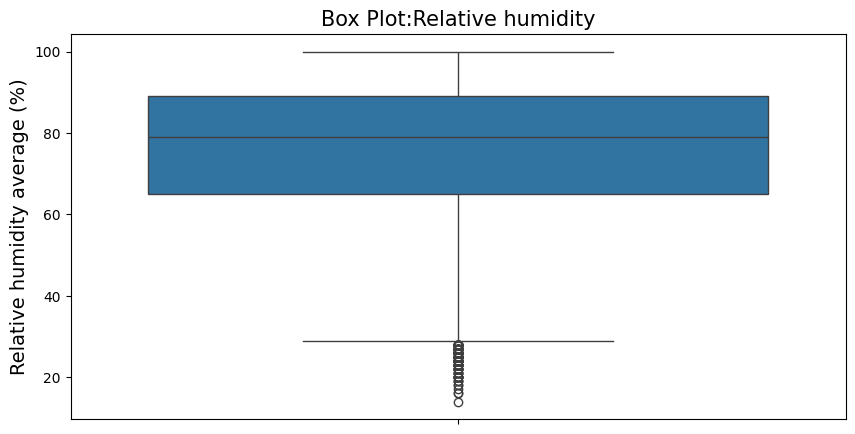

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.rhum)
plt.title('Box Plot:Relative humidity', fontsize=15)
plt.ylabel('Relative humidity average (%)', fontsize=14)
plt.show()

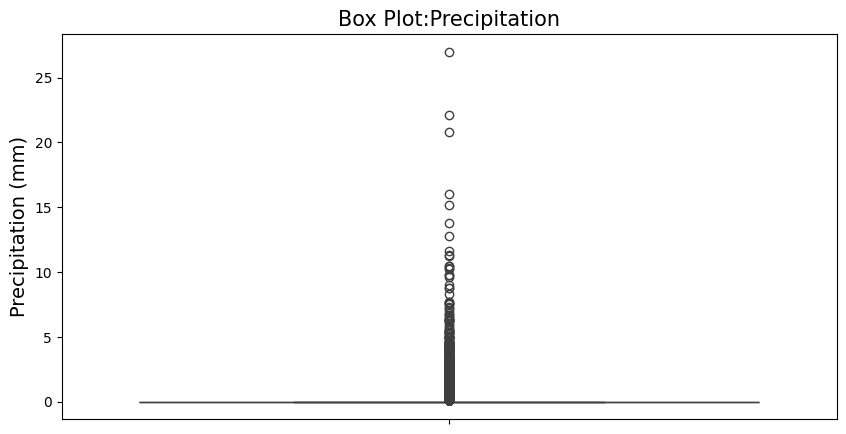

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.prcp)
plt.title('Box Plot:Precipitation', fontsize=15)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.show()

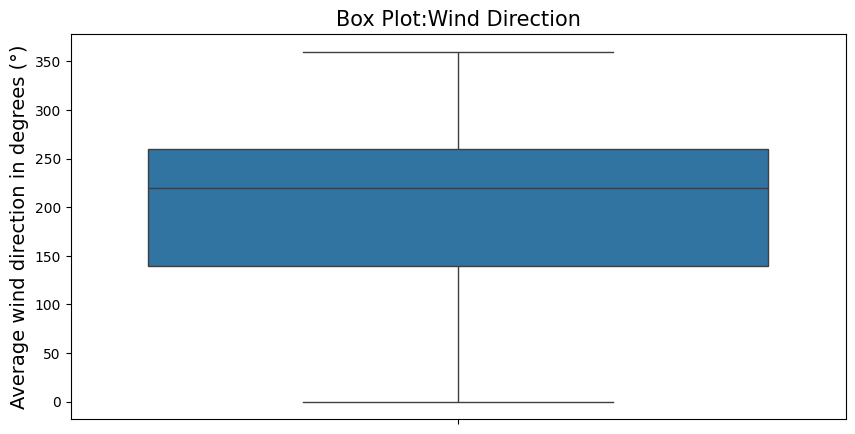

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.wdir)
plt.title('Box Plot:Wind Direction', fontsize=15)
plt.ylabel('Average wind direction in degrees (°)', fontsize=14)
plt.show()

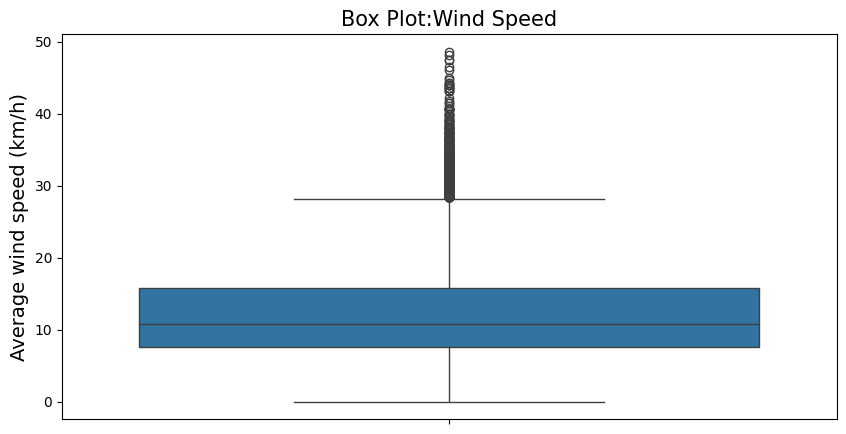

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.wspd)
plt.title('Box Plot:Wind Speed', fontsize=15)
plt.ylabel('Average wind speed (km/h)', fontsize=14)
plt.show()

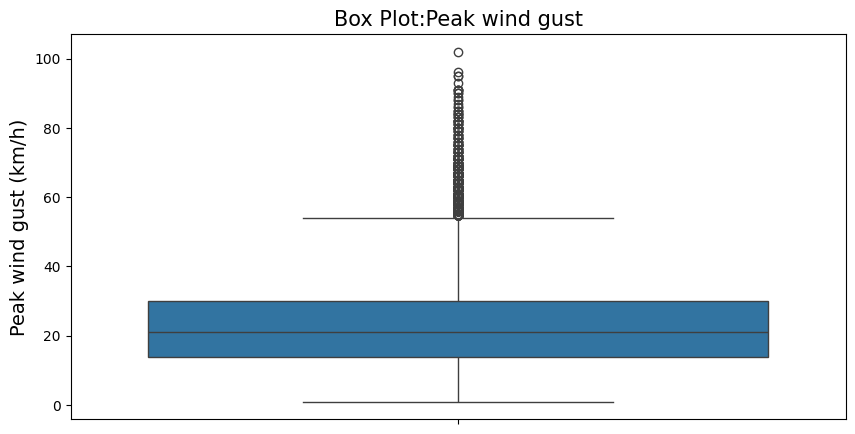

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.wpgt)
plt.title('Box Plot:Peak wind gust', fontsize=15)
plt.ylabel('Peak wind gust (km/h)', fontsize=14)
plt.show()

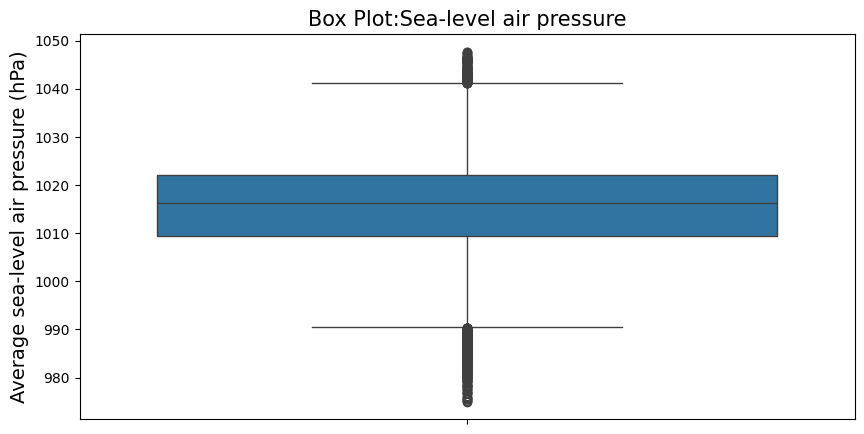

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.pres)
plt.title('Box Plot:Sea-level air pressure', fontsize=15)
plt.ylabel('Average sea-level air pressure (hPa)', fontsize=14)
plt.show()

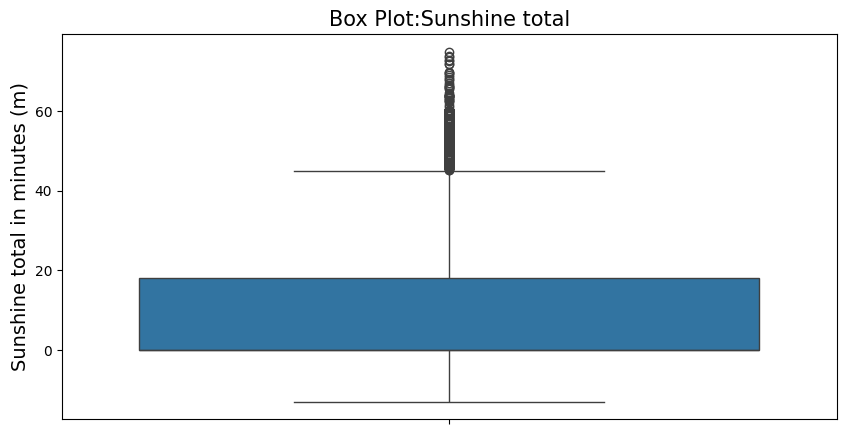

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.tsun)
plt.title('Box Plot:Sunshine total', fontsize=15)
plt.ylabel('Sunshine total in minutes (m)', fontsize=14)
plt.show()

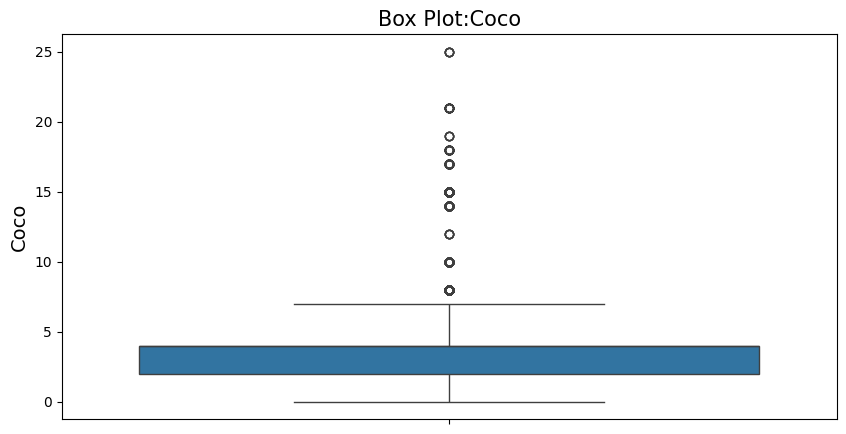

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Braun_df.coco)
plt.title('Box Plot:Coco', fontsize=15)
plt.ylabel('Coco', fontsize=14)
plt.show()

In [ ]:
mask_ntsun = Braun_df['tsun'] > 0.0
Braun_df[mask_ntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
12,7.5,3.2,74.0,0.0,300.0,29.2,50.0,1020.4,2.0,3.0
13,7.5,2.6,71.0,0.0,290.0,30.6,59.0,1019.8,17.0,4.0
14,7.1,2.4,72.0,0.0,280.0,30.6,58.0,1019.7,1.0,8.0
15,6.8,2.1,72.0,0.1,290.0,32.0,64.0,1019.4,1.0,8.0
33,2.9,-2.4,68.0,0.0,320.0,23.0,36.0,1028.5,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...
43788,8.3,3.1,70.0,0.0,250.0,22.7,43.0,1012.1,8.0,4.0
43789,8.1,3.4,72.0,0.0,260.0,20.9,39.0,1012.4,34.0,4.0
43790,8.1,3.2,71.0,0.0,260.0,18.7,31.0,1012.2,47.0,1.0
43791,7.5,3.2,74.0,0.0,250.0,17.6,31.0,1012.5,15.0,1.0


APPLYING LOF ON BRAUNSHWEIG WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20

# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in Braun_df.columns:
# Reshape the data for LOF
 X = Braun_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred ==-1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in Braunschweig weather in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in Braunschweig weather in temp: 0.38%
Percentage of outliers in Braunschweig weather in dwpt: 0.16%
Percentage of outliers in Braunschweig weather in rhum: 0.05%
Percentage of outliers in Braunschweig weather in prcp: 0.06%
Percentage of outliers in Braunschweig weather in wdir: 0.23%
Percentage of outliers in Braunschweig weather in wspd: 0.24%
Percentage of outliers in Braunschweig weather in wpgt: 0.22%
Percentage of outliers in Braunschweig weather in pres: 0.77%
Percentage of outliers in Braunschweig weather in tsun: 2.17%
Percentage of outliers in Braunschweig weather in coco: 0.03%


USING NAIVE BAYES DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Extract features
X = Braun_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = gnb.var_
likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_Braun_df = Braun_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(Braun_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in Braun_df.columns:
    feature_anomalies_count = (anomalies_Braun_df[feature] != Braun_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")

Number of anomalies detected: 4383
Percentage of anomalies for each feature:
temp: 9.95%
dwpt: 9.92%
rhum: 9.75%
prcp: 2.64%
wdir: 9.71%
wspd: 9.86%
wpgt: 9.78%
pres: 9.96%
tsun: 5.05%
coco: 9.01%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in Braun_df.columns:
    # Extract the feature values
    X = Braun_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(Braun_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: temp
  Number of anomalies detected: 1992
  Percentage of anomalies: 4.55%
Feature: dwpt
  Number of anomalies detected: 1591
  Percentage of anomalies: 3.63%
Feature: rhum
  Number of anomalies detected: 2437
  Percentage of anomalies: 5.56%
Feature: prcp
  Number of anomalies detected: 1554
  Percentage of anomalies: 3.55%
Feature: wdir
  Number of anomalies detected: 1738
  Percentage of anomalies: 3.97%
Feature: wspd
  Number of anomalies detected: 2505
  Percentage of anomalies: 5.72%
Feature: wpgt
  Number of anomalies detected: 2415
  Percentage of anomalies: 5.51%
Feature: pres
  Number of anomalies detected: 2767
  Percentage of anomalies: 6.31%
Feature: tsun
  Number of anomalies detected: 5571
  Percentage of anomalies: 12.71%
Feature: coco
  Number of anomalies detected: 929
  Percentage of anomalies: 2.12%


AUTOENCODER MODEL ON WEATHER DATASET

In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential



# #to save all features
# features_auto_w = bonn_df.columns.tolist()


# # DataFrame to store anomaly scores for each feature
# anomaly_scores_auto_w = pd.DataFrame(index=bonn_df.index)

# # Loop through each feature
# for feature in features_auto_w :
#     # Scale the feature data
#     scaler = MinMaxScaler()
#     scaled_feature_auto_w  = scaler.fit_transform(bonn_df[[feature]])

#     # Define the autoencoder model
#     model_auto_w  = Sequential([
#         Dense(32, activation='relu', input_shape=(1,)),
#         Dense(16, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])

#     model_auto_w .compile(optimizer='adam', loss='mean_squared_error')

#      #Train the autoencoder
#     model_auto_w.fit(scaled_feature_auto_w , scaled_feature_auto_w , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

#     # Get reconstruction loss
#     reconstructed_feature_auto_w  = model_auto_w.predict(scaled_feature_auto_w )
#     reconstruction_loss_auto_w  = np.mean(np.square(scaled_feature_auto_w  - reconstructed_feature_auto_w ), axis=1)

#     # Store the reconstruction loss (anomaly score) in the DataFrame
#     anomaly_scores_auto_w [feature] = reconstruction_loss_auto_w



1370/1370 [==============================] - 2s 1ms/step


In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential



# #to save all features
# features_auto_w = Braun_df.columns.tolist()


# # DataFrame to store anomaly scores for each feature
# anomaly_scores_auto_w = pd.DataFrame(index=Braun_df.index)

# # Loop through each feature
# for feature in features_auto_w :
#     # Scale the feature data
#     scaler = MinMaxScaler()
#     scaled_feature_auto_w  = scaler.fit_transform(Braun_df[[feature]])

#     # Define the autoencoder model
#     model_auto_w  = Sequential([
#         Dense(32, activation='relu', input_shape=(1,)),
#         Dense(16, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])

#     model_auto_w .compile(optimizer='adam', loss='mean_squared_error')

#      #Train the autoencoder
#     model_auto_w.fit(scaled_feature_auto_w , scaled_feature_auto_w , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

#     # Get reconstruction loss
#     reconstructed_feature_auto_w  = model_auto_w.predict(scaled_feature_auto_w )
#     reconstruction_loss_auto_w  = np.mean(np.square(scaled_feature_auto_w  - reconstructed_feature_auto_w ), axis=1)

#     # Store the reconstruction loss (anomaly score) in the DataFrame
#     anomaly_scores_auto_w [feature] = reconstruction_loss_auto_w



1370/1370 [==============================] - 2s 1ms/step


In [ ]:

# print(reconstruction_loss_auto_w)
# # Calculate the threshold as the 90th percentile of the reconstruction loss
# threshold_auto_w = np.percentile(reconstruction_loss_auto_w, 90)

#     # Identify anomalies
# anomalies_auto_w = reconstruction_loss_auto_w > threshold_auto_w

# for feature in features_auto_w:
#     anomalies_auto_w = anomaly_scores_auto_w[feature] > threshold_auto_w
#     anomaly_percentage_auto_w = np.mean(anomalies_auto_w) * 100
#     print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_w:.2f}%')


#     # Store the reconstruction loss (anomaly score) in the DataFrame
# anomaly_scores_auto_w[feature] = reconstruction_loss_auto_w


# # Combine anomaly scores with original data for easier analysis
# combined_data_auto_w = pd.concat([Braun_df, anomaly_scores_auto_w.add_suffix('_anomaly_score')], axis=1)

# # Save the combined data with anomaly scores
# combined_data_auto_w.to_csv('Braun_df_with_anomaly_scores_auto_w.csv', index=False)

# # Display the first few rows of the combined data
# combined_data_auto_w.head()

[4.21480094e-07 4.21480094e-07 4.21480094e-07 ... 3.28430198e-10
 3.28430198e-10 3.28430198e-10]
Feature: temp, Anomaly Percentage: 21.31%
Feature: dwpt, Anomaly Percentage: 91.66%
Feature: rhum, Anomaly Percentage: 46.71%
Feature: prcp, Anomaly Percentage: 4.67%
Feature: wdir, Anomaly Percentage: 84.24%
Feature: wspd, Anomaly Percentage: 45.00%
Feature: wpgt, Anomaly Percentage: 38.51%
Feature: pres, Anomaly Percentage: 69.98%
Feature: tsun, Anomaly Percentage: 28.08%
Feature: coco, Anomaly Percentage: 7.08%


,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco,temp_anomaly_score,dwpt_anomaly_score,rhum_anomaly_score,prcp_anomaly_score,wdir_anomaly_score,wspd_anomaly_score,wpgt_anomaly_score,pres_anomaly_score,tsun_anomaly_score,coco_anomaly_score
0,8.6,5.2,79.0,0.0,260.0,22.0,38.0,1027.8,0.0,7.0,1.090987e-07,0.000001,2.876779e-06,1.156318e-08,1.567662e-05,1.975322e-08,2.239382e-07,9.413493e-06,1.366887e-07,4.214801e-07
1,8.1,5.4,83.0,0.0,260.0,21.6,44.0,1027.0,0.0,7.0,1.682923e-07,0.000001,1.567614e-08,1.156318e-08,1.567662e-05,1.526790e-11,2.354231e-06,8.303019e-06,1.366887e-07,4.214801e-07
2,7.8,5.9,88.0,0.0,260.0,20.2,40.0,1026.2,0.0,7.0,2.024883e-07,0.000002,8.089840e-08,1.156318e-08,1.567662e-05,3.888054e-08,5.089451e-07,5.848102e-06,1.366887e-07,4.214801e-07
3,7.6,5.7,88.0,0.0,270.0,21.6,40.0,1025.5,0.0,7.0,2.231391e-07,0.000002,8.089840e-08,1.156318e-08,1.904670e-07,1.526790e-11,5.089451e-07,3.213101e-06,1.366887e-07,4.214801e-07
4,7.6,5.2,85.0,0.0,270.0,23.0,47.0,1024.5,0.0,7.0,2.231391e-07,0.000001,2.498735e-06,1.156318e-08,1.904670e-07,3.464288e-07,2.237849e-06,3.075803e-07,1.366887e-07,4.214801e-07


In [ ]:
APPLYING XGBOOST ON WEATHER DATASET

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(Braun_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: temp
Threshold: 0.3197
Anomalies detected: 1442/43824 (3.29%)
----------------------------------------
Feature: dwpt
Threshold: 0.3078
Anomalies detected: 1261/43824 (2.88%)
----------------------------------------
Feature: rhum
Threshold: 2.1824
Anomalies detected: 1982/43824 (4.52%)
----------------------------------------
Feature: prcp
Threshold: 0.4993
Anomalies detected: 883/43824 (2.01%)
----------------------------------------
Feature: wdir
Threshold: 128.7660
Anomalies detected: 2398/43824 (5.47%)
----------------------------------------
Feature: wspd
Threshold: 3.0063
Anomalies detected: 1689/43824 (3.85%)
----------------------------------------
Feature: wpgt
Threshold: 5.6313
Anomalies detected: 1428/43824 (3.26%)
----------------------------------------
Feature: pres
Threshold: 14.4961
Anomalies detected: 2189/43824 (4.99%)
----------------------------------------
Feature: tsun
Threshold: 25.1904
Anomalies detected: 2598/43824 (5.93%)
------------------------------

IRRADIATION DATASET

In [ ]:
import pandas as pd
import requests
#importing irradiation data for Meiningen
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=irradiationdataforcities&start=2019-01-01&end=2023-12-31&cityName=Braunschweig"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    data = response.json()

    # Convert the data to a DataFrame
    df_irrad = pd.DataFrame.from_dict(data, orient='index')


else:
    print("Failed to fetch data. Status code:", response.status_code)


In [ ]:
df_irrad.head()

,time,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability,cityName
1546300800000,2019-01-01 00:00:00,2019-01-01T00:00:00.0/2019-01-01T00:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Braunschweig
1546301700000,2019-01-01 00:15:00,2019-01-01T00:15:00.0/2019-01-01T00:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Braunschweig
1546302600000,2019-01-01 00:30:00,2019-01-01T00:30:00.0/2019-01-01T00:45:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Braunschweig
1546303500000,2019-01-01 00:45:00,2019-01-01T00:45:00.0/2019-01-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Braunschweig
1546304400000,2019-01-01 01:00:00,2019-01-01T01:00:00.0/2019-01-01T01:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Braunschweig


In [ ]:

# drop unwanted columns
clean_df = df_irrad.drop(columns = ["time", "Observation period", "Reliability", "cityName"])
df_irrad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                175296 non-null  object 
 1   Observation period  175296 non-null  object 
 2   TOA                 175296 non-null  object 
 3   Clear sky GHI       175296 non-null  object 
 4   Clear sky BHI       175296 non-null  object 
 5   Clear sky DHI       175296 non-null  object 
 6   Clear sky BNI       175296 non-null  object 
 7   GHI                 175296 non-null  float64
 8   BHI                 175296 non-null  object 
 9   DHI                 175296 non-null  object 
 10  BNI                 175296 non-null  object 
 11  Reliability         175296 non-null  object 
 12  cityName            175296 non-null  object 
dtypes: float64(1), object(12)
memory usage: 18.7+ MB


In [ ]:
#Get the percentage of null values in the dataset
clean_df.isnull().sum() /len(df_irrad) *(100)

TOA              0.0
Clear sky GHI    0.0
Clear sky BHI    0.0
Clear sky DHI    0.0
Clear sky BNI    0.0
GHI              0.0
BHI              0.0
DHI              0.0
BNI              0.0
dtype: float64

In [ ]:
clean_df_B = clean_df.select_dtypes("object").astype("float")
clean_df_B["GHI"] = clean_df["GHI"]

In [ ]:
clean_df_B.describe()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,BHI,DHI,BNI,GHI
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,68.363632,47.872745,35.950413,11.922332,73.776538,16.040906,16.466210,32.415410,32.507117
std,89.230999,66.541824,53.066751,15.229562,85.375462,36.272233,24.923052,60.519826,52.212969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.522050,0.608200,0.029050,0.569200,0.375950,0.000000,0.475750,0.000000,0.499600
75%,127.893925,85.714225,60.963275,22.470675,163.642650,8.086475,25.804450,33.253150,46.879150
max,288.635600,232.849000,210.583000,80.566800,248.260700,210.583000,126.526200,248.260700,232.849000


In [ ]:

# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = clean_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


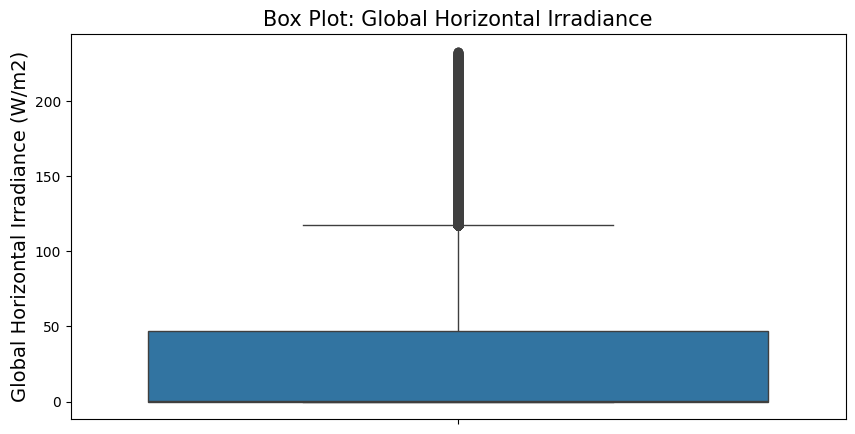

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.GHI)
plt.title('Box Plot: Global Horizontal Irradiance', fontsize=15)
plt.ylabel('Global Horizontal Irradiance (W/m2)', fontsize=14)
plt.show()

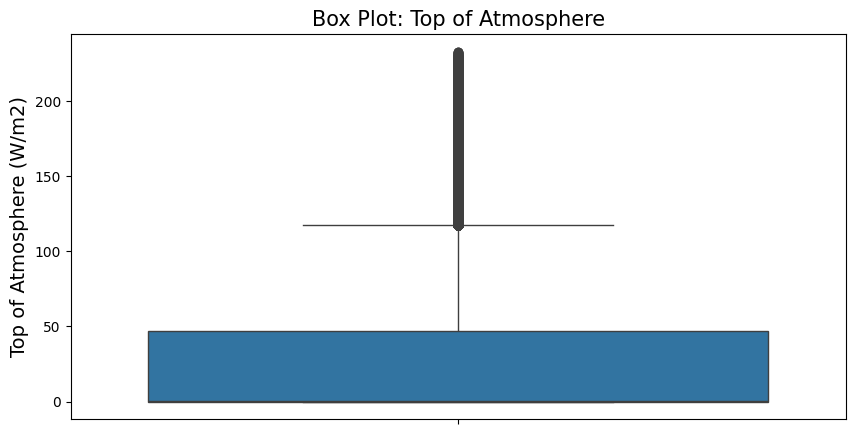

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.GHI)
plt.title('Box Plot: Top of Atmosphere', fontsize=15)
plt.ylabel('Top of Atmosphere (W/m2)', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20

# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in clean_df.columns:
# Reshape the data for LOF
 X = clean_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in Braunschweig irradiation in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in Braunschweig irradiation in TOA: 0.06%
Percentage of outliers in Braunschweig irradiation in Clear sky GHI: 0.02%
Percentage of outliers in Braunschweig irradiation in Clear sky BHI: 0.09%
Percentage of outliers in Braunschweig irradiation in Clear sky DHI: 0.00%
Percentage of outliers in Braunschweig irradiation in Clear sky BNI: 0.01%
Percentage of outliers in Braunschweig irradiation in GHI: 0.01%
Percentage of outliers in Braunschweig irradiation in BHI: 0.15%
Percentage of outliers in Braunschweig irradiation in DHI: 0.02%
Percentage of outliers in Braunschweig irradiation in BNI: 0.08%


NAIVE BAYES FOR IRRADIATION


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

# Assuming clean_Osna_Irrad is your DataFrame loaded from your dataset
# Example steps to handle data types and missing values

# Step 1: Check and Convert Data Types
# Convert all columns to numeric (float64)
clean_df = clean_df.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle Missing Values
clean_df = clean_df.dropna()  # Drop rows with NaN values

# Extract features
X = clean_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = np.var(X, axis=0) + 1e-9  # Adding a small value for numerical stability

likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_clean_df = clean_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(clean_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in clean_df.columns:
    feature_anomalies_count = (anomalies_clean_df[feature] != clean_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 17530
Percentage of anomalies for each feature:
TOA: 10.00%
Clear sky GHI: 10.00%
Clear sky BHI: 10.00%
Clear sky DHI: 10.00%
Clear sky BNI: 10.00%
GHI: 10.00%
BHI: 9.99%
DHI: 10.00%
BNI: 9.99%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in clean_df.columns:
    # Extract the feature values
    X = clean_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(clean_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: TOA
  Number of anomalies detected: 16299
  Percentage of anomalies: 9.30%
Feature: Clear sky GHI
  Number of anomalies detected: 17174
  Percentage of anomalies: 9.80%
Feature: Clear sky BHI
  Number of anomalies detected: 17365
  Percentage of anomalies: 9.91%
Feature: Clear sky DHI
  Number of anomalies detected: 13527
  Percentage of anomalies: 7.72%
Feature: Clear sky BNI
  Number of anomalies detected: 9614
  Percentage of anomalies: 5.48%
Feature: GHI
  Number of anomalies detected: 17062
  Percentage of anomalies: 9.73%
Feature: BHI
  Number of anomalies detected: 15503
  Percentage of anomalies: 8.84%
Feature: DHI
  Number of anomalies detected: 15869
  Percentage of anomalies: 9.05%
Feature: BNI
  Number of anomalies detected: 18638
  Percentage of anomalies: 10.63%


AUTOENCODER ON IRRRADIATION DATASET

In [ ]:
clean_df.head()
df_irrad = df_irrad.drop(columns=["Reliability", "cityName", "time", "Observation period"])
df_irrad.head()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_i = df_irrad.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_i = pd.DataFrame(index=df_irrad.index)

# Loop through each feature
for feature in features_auto_i :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_i  = scaler.fit_transform(df_irrad[[feature]])

    # Define the autoencoder model
    model_auto_i  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_i .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_i.fit(scaled_feature_auto_i , scaled_feature_auto_i , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_i  = model_auto_i.predict(scaled_feature_auto_i)
    reconstruction_loss_auto_i  = np.mean(np.square(scaled_feature_auto_i  - reconstructed_feature_auto_i), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_i [feature] = reconstruction_loss_auto_i



5478/5478 [==============================] - 12s 2ms/step


In [ ]:

print(reconstruction_loss_auto_i)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

    # Identify anomalies
anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

for feature in features_auto_i:
    anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
    anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# Combine anomaly scores with original data for easier analysis
combined_data_auto_i = pd.concat([df_irrad, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_i.to_csv('df_irrad_with_anomaly_scores_auto_i.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_i.head()






[3.33693879e-08 3.33693879e-08 3.33693879e-08 ... 3.33693879e-08
 3.33693879e-08 3.33693879e-08]
Feature: TOA, Anomaly Percentage: 6.36%
Feature: Clear sky GHI, Anomaly Percentage: 13.55%
Feature: Clear sky BHI, Anomaly Percentage: 2.23%
Feature: Clear sky DHI, Anomaly Percentage: 0.90%
Feature: Clear sky BNI, Anomaly Percentage: 5.28%
Feature: GHI, Anomaly Percentage: 3.74%
Feature: BHI, Anomaly Percentage: 0.04%
Feature: DHI, Anomaly Percentage: 0.34%
Feature: BNI, Anomaly Percentage: 10.00%


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,TOA_anomaly_score,Clear sky GHI_anomaly_score,Clear sky BHI_anomaly_score,Clear sky DHI_anomaly_score,Clear sky BNI_anomaly_score,GHI_anomaly_score,BHI_anomaly_score,DHI_anomaly_score,BNI_anomaly_score
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,2.010470e-08,9.190168e-09,1.335394e-08,4.553871e-09,7.478524e-08,2.196808e-08,2.114463e-08,5.737859e-09,3.336939e-08
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,2.010470e-08,9.190168e-09,1.335394e-08,4.553871e-09,7.478524e-08,2.196808e-08,2.114463e-08,5.737859e-09,3.336939e-08
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,2.010470e-08,9.190168e-09,1.335394e-08,4.553871e-09,7.478524e-08,2.196808e-08,2.114463e-08,5.737859e-09,3.336939e-08
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,2.010470e-08,9.190168e-09,1.335394e-08,4.553871e-09,7.478524e-08,2.196808e-08,2.114463e-08,5.737859e-09,3.336939e-08
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,2.010470e-08,9.190168e-09,1.335394e-08,4.553871e-09,7.478524e-08,2.196808e-08,2.114463e-08,5.737859e-09,3.336939e-08


In [ ]:
BR_df = clean_df.select_dtypes(include=['object']).astype('float')
BR_df['GHI'] = clean_df['GHI']
BR_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOA            175296 non-null  float64
 1   Clear sky GHI  175296 non-null  float64
 2   Clear sky BHI  175296 non-null  float64
 3   Clear sky DHI  175296 non-null  float64
 4   Clear sky BNI  175296 non-null  float64
 5   BHI            175296 non-null  float64
 6   DHI            175296 non-null  float64
 7   BNI            175296 non-null  float64
 8   GHI            175296 non-null  float64
dtypes: float64(9)
memory usage: 13.4+ MB


In [ ]:
result = (BR_df['GHI'] == 0.0)
round((len(BR_df[result])/len(BR_df)) *100, 2)

48.81

XGBOOST ON IRRRADIATION

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(BR_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: TOA
Threshold: 2.0316
Anomalies detected: 9925/175296 (5.66%)
----------------------------------------
Feature: Clear sky GHI
Threshold: 1.0139
Anomalies detected: 9974/175296 (5.69%)
----------------------------------------
Feature: Clear sky BHI
Threshold: 0.8969
Anomalies detected: 10116/175296 (5.77%)
----------------------------------------
Feature: Clear sky DHI
Threshold: 1.2758
Anomalies detected: 9566/175296 (5.46%)
----------------------------------------
Feature: Clear sky BNI
Threshold: 4.0647
Anomalies detected: 10236/175296 (5.84%)
----------------------------------------
Feature: BHI
Threshold: 0.8910
Anomalies detected: 9483/175296 (5.41%)
----------------------------------------
Feature: DHI
Threshold: 1.1559
Anomalies detected: 8914/175296 (5.09%)
----------------------------------------
Feature: BNI
Threshold: 2.5677
Anomalies detected: 8914/175296 (5.09%)
----------------------------------------
Feature: GHI
Threshold: 1.1476
Anomalies detected: 8563/175296

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Detect anomalies using LOF (per feature)
def detect_anomalies_lof(df, n_neighbors=20):
    df_lof = df.copy()
    for column in df.columns:
        # Fit the LOF model for each feature
        lof = LocalOutlierFactor(n_neighbors=n_neighbors)
        outliers = lof.fit_predict(df[[column]])
        # Mark anomalies with NaN
        df_lof.loc[outliers == -1, column] = np.nan
    return df_lof

# Compensate for anomalies using Iterative Imputer
def compensate_anomalies_iterative(df_lof):
    imputer = IterativeImputer(random_state=42)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_lof), columns=df_lof.columns)
    return df_imputed

# Calculate the percentage of anomalies per feature
def calculate_anomaly_percentage(df_original, df_interpolated):
    percentages = {}
    for column in df_original.columns:
        total_values = len(df_original[column])
        missing_before = df_original[column].isna().sum()
        missing_after = df_interpolated[column].isna().sum()
        percentage_before = (missing_before / total_values) * 100
        percentage_after = (missing_after / total_values) * 100
        percentages[column] = {
            'before': percentage_before,
            'after': percentage_after
        }
    return percentages

# Run another LOF after compensation to check new anomaly percentage
def detect_anomalies_lof_after_compensation(df, n_neighbors=20):
    anomalies_count = {}
    for column in df.columns:
        # Fit the LOF model for each feature
        lof = LocalOutlierFactor(n_neighbors=n_neighbors)
        outliers = lof.fit_predict(df[[column]])
        # Count anomalies
        anomalies_count[column] = (outliers == -1).sum()
    return anomalies_count

# Load your dataset
# df_m = pd.read_csv('your_dataset.csv')

# Detect anomalies
df_lof = detect_anomalies_lof(BR_df, n_neighbors=20)
print("Data with LOF Anomalies Marked:\n", df_lof)

# Compensate for anomalies using Iterative Imputer
df_imputed = compensate_anomalies_iterative(df_lof)
print("Iterative Imputer:\n", df_imputed)

# Calculate anomaly percentages
percentages = calculate_anomaly_percentage(df_lof, df_imputed)
for feature, percent in percentages.items():
    print(f"Feature: {feature}")
    print(f"  Percentage of Anomalies Before Compensation: {percent['before']:.2f}%")

# Detect anomalies post-compensation
anomalies_count_after = detect_anomalies_lof_after_compensation(df_imputed, n_neighbors=20)
for feature, count in anomalies_count_after.items():
    percentage_after_compensation = (count / len(df_imputed[feature])) * 100
    print(f"Feature: {feature}")
    print(f"  Percentage of Anomalies After LOF Post-Compensation: {percentage_after_compensation:.2f}%")

# Save the compensated data to a new CSV file
df_imputed.to_csv('df_m_with_iterative_imputation.csv', index=False)


Data with LOF Anomalies Marked:
                TOA  Clear sky GHI  Clear sky BHI  Clear sky DHI  \
1546300800000  0.0            0.0            0.0            0.0   
1546301700000  0.0            0.0            0.0            0.0   
1546302600000  0.0            0.0            0.0            0.0   
1546303500000  0.0            0.0            0.0            0.0   
1546304400000  0.0            0.0            0.0            0.0   
...            ...            ...            ...            ...   
1704062700000  0.0            0.0            0.0            0.0   
1704063600000  0.0            0.0            0.0            0.0   
1704064500000  0.0            0.0            0.0            0.0   
1704065400000  0.0            0.0            0.0            0.0   
1704066300000  0.0            0.0            0.0            0.0   

               Clear sky BNI  BHI  DHI  BNI  GHI  
1546300800000            0.0  0.0  0.0  0.0  0.0  
1546301700000            0.0  0.0  0.0  0.0  0.0  
154630260